# Import Library

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import re
import urllib
import unidecode

# Proyek Analisa Data: E-Commerce Olist Brazil

> Nama: **Saiful Islam**
> 
> Email: **saifulvii@gmail.com**
> 
> Id Dicoding: **saifulsm**


### Menentukan Pertanyaan Bisnis
> - *Produk apa yang mendapatkan penghasilan paling besar dan paling kecil*
> - *Bagaimana tingkat kepuasan pelanggan?*
> - *Bagaimana performa penjualan perusahaan?*
> - *Customer terbanyak berdasarkan geografis,terletak dimana saja?*

# Data Wrangling


### Gathering data

membaca dataset

In [242]:
customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('./data/olist_geolocation_dataset.csv')
items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
reviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
all_orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
products_df = pd.read_csv('./data/olist_products_dataset.csv')
sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
product_cat_translate = pd.read_csv('./data/product_category_name_translation.csv')


**map ke dictionary agar memudahkan prosses pengecekan**

In [243]:
ecommerce = {
    'customer': customers_df,
    'geolocation': geolocation_df,
    'item': items_df,
    'payment': payments_df,
    'review': reviews_df,
    'order': all_orders_df,
    'product': products_df,
    'seller': sellers_df,
    'product_cat': product_cat_translate
}

In [244]:
ecommerce['customer'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [245]:
ecommerce['geolocation'].head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [246]:
ecommerce['item'].head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [247]:
ecommerce['payment'].head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [248]:
ecommerce['review'].head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [249]:
ecommerce['order'].head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [250]:
ecommerce['product'].head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [251]:
ecommerce['seller'].head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [252]:
ecommerce['product_cat'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Assessing Data


**Memeriksa semua tipe data**

In [253]:
for keys in ecommerce.keys():
    print(f'\n{ecommerce[keys].info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-

**Memeriksa total value yang belum terisi**

In [254]:
for keys in ecommerce.keys():
    for key in ecommerce[keys].keys():
        if ecommerce[keys][key].isna().sum():
            print('total missing value from {}: {}'.format(key, ecommerce[keys][key].isna().sum()))



total missing value from review_comment_title: 87656
total missing value from review_comment_message: 58247
total missing value from order_approved_at: 160
total missing value from order_delivered_carrier_date: 1783
total missing value from order_delivered_customer_date: 2965
total missing value from product_category_name: 610
total missing value from product_name_lenght: 610
total missing value from product_description_lenght: 610
total missing value from product_photos_qty: 610
total missing value from product_weight_g: 2
total missing value from product_length_cm: 2
total missing value from product_height_cm: 2
total missing value from product_width_cm: 2


**Memeriksa total data yang terduplikasi**

In [255]:
for keys in ecommerce.keys():
    for key in ecommerce[keys].keys():
        if ecommerce[keys][key].isna().sum():
            print('total duplicated from {}: {}'.format(key,ecommerce[keys][key].duplicated().sum()))

total duplicated from review_comment_title: 94696
total duplicated from review_comment_message: 63064
total duplicated from order_approved_at: 8707
total duplicated from order_delivered_carrier_date: 18422
total duplicated from order_delivered_customer_date: 3776
total duplicated from product_category_name: 32877
total duplicated from product_name_lenght: 32884
total duplicated from product_description_lenght: 29990
total duplicated from product_photos_qty: 32931
total duplicated from product_weight_g: 30746
total duplicated from product_length_cm: 32851
total duplicated from product_height_cm: 32848
total duplicated from product_width_cm: 32855


**Memeriksa total data null**

In [256]:
for keys in ecommerce.keys():
    for key in ecommerce[keys].keys():
        if ecommerce[keys][key].isna().sum():
            print('total data null from {}: {}'.format(key, ecommerce[keys][key].isnull().sum()))

total data null from review_comment_title: 87656
total data null from review_comment_message: 58247
total data null from order_approved_at: 160
total data null from order_delivered_carrier_date: 1783
total data null from order_delivered_customer_date: 2965
total data null from product_category_name: 610
total data null from product_name_lenght: 610
total data null from product_description_lenght: 610
total data null from product_photos_qty: 610
total data null from product_weight_g: 2
total data null from product_length_cm: 2
total data null from product_height_cm: 2
total data null from product_width_cm: 2


In [257]:
for keys in ecommerce.keys():
    print('describe dataset {}: {}'.format(keys, ecommerce[keys].describe(include="all")))

describe dataset customer:                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix cus

**Memeriksa total duplikasi data**

In [258]:
for keys in ecommerce.keys():
    if keys == 'geolocation':
        for key in ecommerce[keys].keys():
            print(f'duplicated data from geolocation in field {key}: {ecommerce[keys][key].duplicated().sum()}')

duplicated data from geolocation in field geolocation_zip_code_prefix: 981148
duplicated data from geolocation in field geolocation_lat: 282803
duplicated data from geolocation in field geolocation_lng: 282550
duplicated data from geolocation in field geolocation_city: 992152
duplicated data from geolocation in field geolocation_state: 1000136


# Cleaning Data

**Ubah semua field waktu menjadi datetime**

In [259]:
for keys in ecommerce.keys():
    dump = []
    for key in ecommerce[keys].keys():
        reg = re.search(".*_date|.*_timestamp|.*_at",str(key))
        if reg:
            dump.append(reg.group(0))
    if dump:
        for i in dump:
            ecommerce[keys][i] = pd.to_datetime(ecommerce[keys][i])
    print(f'{ecommerce[keys].info()}') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-n

In [260]:
ecommerce['review'][ecommerce['review'].review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [261]:
ecommerce['review'].review_comment_title.fillna(value='no title',inplace=True)
ecommerce['review'].review_comment_message.fillna(value='no comment',inplace=True)


/tmp/ipykernel_17235/1494342120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecommerce['review'].review_comment_title.fillna(value='no title',inplace=True)
/tmp/ipykernel_17235/1494342120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [262]:
ecommerce['review']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no title,no comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no title,no comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no title,no comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,no title,no comment,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,no title,no comment,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,no title,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,no title,no comment,2018-07-01,2018-07-02 12:59:13


In [263]:
ecommerce['review'].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [264]:
product_drop = ['product_weight_g','product_length_cm','product_height_cm','product_width_cm']

ecommerce['product'].drop(product_drop, axis= 1, inplace= True)

In [265]:
ecommerce['product']


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0
...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0


In [266]:
ecommerce['product'].product_category_name.fillna(value="other",inplace=True)

/tmp/ipykernel_17235/4194018475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecommerce['product'].product_category_name.fillna(value="other",inplace=True)


In [267]:
ecommerce['product'].product_category_name.isna().sum()

0

In [268]:
ecommerce['product'].product_photos_qty.fillna(value=0,inplace=True)

/tmp/ipykernel_17235/1912149648.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecommerce['product'].product_photos_qty.fillna(value=0,inplace=True)


In [269]:
ecommerce['product'].product_photos_qty.isna().sum()

0

# Explanatory Data Analysis 

### Customer

In [270]:
ecommerce['customer']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [271]:
ecommerce['customer'].groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [272]:
ecommerce['customer'].groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [273]:
ecommerce['customer'].customer_city.apply(lambda x: unidecode(x) if x == 'são paulo' else x)


0                       franca
1        sao bernardo do campo
2                    sao paulo
3              mogi das cruzes
4                     campinas
                 ...          
99436                sao paulo
99437          taboao da serra
99438                fortaleza
99439                   canoas
99440                    cotia
Name: customer_city, Length: 99441, dtype: object

In [274]:
(ecommerce['customer'].customer_city == 'são paulo').sum()

0

### Payment

In [275]:
ecommerce['payment'].groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [276]:
ecommerce['payment'].groupby(by='payment_type',sort=False).agg({
    'order_id': 'nunique',
    'payment_value': ['mean','min','max']
})

order_id payment_value                 
              nunique          mean    min       max
payment_type                                        
credit_card     76505    163.319021   0.01  13664.08
boleto          19784    145.034435  11.62   7274.88
voucher          3866     65.703354   0.00   3184.34
debit_card       1528    142.570170  13.38   4445.50
not_defined         3      0.000000   0.00      0.00

### Review


In [277]:
ecommerce['review'].groupby(by='review_score').review_id.nunique().sort_values(ascending=False)

review_score
5    56910
4    19007
1    11282
3     8097
2     3114
Name: review_id, dtype: int64

In [278]:
deliver_time = ecommerce['order'].order_delivered_customer_date - ecommerce['order'].order_delivered_carrier_date
deliver_time = deliver_time.apply(lambda x: x.total_seconds())

ecommerce['order']['deliver_time'] = round(deliver_time/86400)


In [279]:
ecommerce['order']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,21.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13.0


<Axes: >

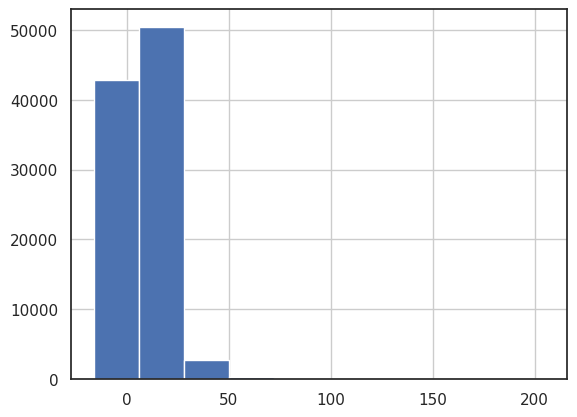

In [280]:
ecommerce['order'].deliver_time.hist()

### Geolocation

In [281]:
ecommerce['geolocation'].sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
199547,8220,-23.536867,-46.470572,são paulo,SP
273646,12233,-23.238174,-45.886240,sao jose dos campos,SP
922267,89053,-26.876088,-49.086620,blumenau,SC
210219,8526,-23.554617,-46.382394,ferraz de vasconcelos,SP
42664,3080,-23.532941,-46.579343,sao paulo,SP
845402,80310,-25.455368,-49.308253,curitiba,PR
506939,27511,-22.466983,-44.450441,resende,RJ
851182,81330,-25.491688,-49.327429,curitiba,PR
940116,90020,-30.028114,-51.224540,porto alegre,RS
910818,88317,-26.893618,-48.743155,itajai,SC


### Order & Customer

In [282]:
order_customer_df = pd.merge(
    left = ecommerce['customer'],
    right = ecommerce['order'],
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)
order_customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [283]:
order_customer_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [284]:
order_customer_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [285]:
order_customer_df.groupby(by='order_status').customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,order_status,customer_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


### Order_cust & Review

In [286]:
order_cr_df = pd.merge(
    left = order_customer_df,
    right = ecommerce['review'],
    how = 'left',
    left_on = 'order_id',
    right_on ='order_id'
)
order_cr_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,no title,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no title,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0,5ad6695d76ee186dc473c42706984d87,5.0,no title,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,059a801bb31f6aab2266e672cab87bc5,5.0,no title,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,10.0,9a6614162d285301aa3ef6de4be75265,5.0,no title,Loja responsável,2017-09-29,2017-10-01 21:52:53
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,1.0,bc88d3b86fa8443d42894eb7b5f0d73c,5.0,no title,no comment,2018-02-21,2018-02-26 13:53:18
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,5.0,2381e1fb0932d9459573a0553dd8a2b5,3.0,no title,no comment,2017-11-28,2017-11-28 17:14:46
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20,8.0,8566d94f7bf3bedbb4ca6a29725fc382,5.0,no title,chegou antes do prometido,2018-01-27,2018-01-30 19:18:27
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05,3.0,07f4bedc3ab711f4b3400ceaecdd9f9b,5.0,no title,"ótimo, entregou antes da data prevista.",2018-01-14,2018-01-16 19:29:39


In [287]:
res = order_cr_df.groupby(by=['order_status','review_score'],sort=False).size().reset_index(name='score_count')

In [288]:
weights = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

# Hitung skor kepuasan tertimbang untuk setiap kombinasi 'order_status' dan 'review_score'
res['weighted_score'] = res['review_score'].map(weights) * res['score_count']
total_weighted_score = res.groupby('order_status')['weighted_score'].sum()
total_review_count = res.groupby('order_status')['score_count'].sum()
average_satisfaction = total_weighted_score / total_review_count

average_satisfaction.sort_values(ascending=False).reset_index(name='average_satisfaction')

,order_status,average_satisfaction
0,delivered,4.155717
1,approved,2.500000
2,created,2.333333
3,shipped,2.008629
4,canceled,1.811166
5,invoiced,1.661342
6,unavailable,1.530988
7,processing,1.277027


### Order & Payment

In [289]:
order_crp = pd.merge(
    left = order_cr_df,
    right = ecommerce['payment'],
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
order_crp.groupby(by='payment_type',sort=False).agg({
    'order_id': 'nunique',
    'payment_value': ['mean','min','max']
})

order_id payment_value                 
              nunique          mean    min       max
payment_type                                        
credit_card     76505    163.140977   0.01  13664.08
debit_card       1528    142.396569  13.38   4445.50
voucher          3866     65.499655   0.00   3184.34
boleto          19784    144.986413  11.62   7274.88
not_defined         3      0.000000   0.00      0.00

In [290]:
order_crp.sort_values(by='payment_value',ascending=False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
6520,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,211fa81a22870cc634265ea85b751e40,1.0,no title,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39,1.0,credit_card,1.0,13664.08
103430,ec5b2ba62e574342386871631fafd3fc,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,736e1922ae60d0d6a89247b851902527,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,...,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10,1.0,boleto,1.0,7274.88
14150,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,...,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no title,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41,1.0,credit_card,8.0,6929.31
22238,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,29066,vitoria,ES,fefacc66af859508bf1a7934eab1e97f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,6922.21
4115,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,f5136e38d1a14a4dbd87dff67da82701,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,...,1b73e6c7cd135008ebeb18404b776ddc,5.0,no title,no comment,2017-06-06,2017-06-07 19:35:23,1.0,boleto,1.0,6726.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26998,9af2372a1e49340278e7c1ef8d749f34,8af7ac63b2efbcbd88e5b11505e8098a,78065,cuiaba,MT,fa65dad1b0e818e3ccc5cb0e39231352,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,...,f28281373ab8815bafafe371218f02ce,1.0,no title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27,14.0,voucher,1.0,0.00
54989,f2def7f64f36952f2f5a9791f0285f34,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,RJ,8bcbe01d44d147f901cd3192671144db,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,...,3d42038fd2a7d35a88b93cb3e51796a3,4.0,no title,no comment,2018-02-03,2018-02-11 17:34:29,4.0,voucher,1.0,0.00
3941,a73c1f73f5772cf801434bf984b0b1a7,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,4637ca194b6387e2d538dc89b124b0ee,canceled,2018-09-03 14:14:25,NaT,NaT,...,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40,1.0,not_defined,1.0,0.00
51202,3532ba38a3fd242259a514ac2b6ae6b6,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,...,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,1.0,not_defined,1.0,0.00


### Seller & Item

In [291]:
seller_item_df = pd.merge(
    left = ecommerce['seller'],
    right = ecommerce['item'],
    how = 'left',
    left_on ='seller_id',
    right_on ='seller_id'
)
seller_item_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [292]:
seller_item_df.groupby(by='seller_city',sort=False).seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

### Product & Product Category

In [293]:
product_category = pd.merge(
    left = ecommerce['product'],
    right = ecommerce['product_cat'],
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)
product_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,housewares


In [294]:
product_category.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [295]:
product_category.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False).head(10)


product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

### Seller_Item & Product

In [296]:
seller_ip = pd.merge(
    left = seller_item_df,
    right = product_category,
    how = 'left',
    left_on ='product_id',
    right_on ='product_id'
)
seller_ip.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,esporte_lazer,26.0,417.0,3.0,sports_leisure
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,esporte_lazer,27.0,485.0,2.0,sports_leisure
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,esporte_lazer,44.0,1089.0,1.0,sports_leisure
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,malas_acessorios,21.0,769.0,4.0,luggage_accessories
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,papelaria,30.0,832.0,5.0,stationery
5,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,06e4e324b83309e575442446e34377d7,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-06-30 02:25:24,99.90,22.70,malas_acessorios,21.0,769.0,4.0,luggage_accessories
6,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af,2017-12-07 14:13:33,199.99,13.10,papelaria,31.0,386.0,5.0,stationery
7,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,1887b26eba419ce20f6fe34a6f88e80a,1,765c417cdc38443aaa558a0159a98591,2017-05-08 14:35:15,209.90,21.55,malas_acessorios,26.0,998.0,7.0,luggage_accessories
8,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb,2017-09-17 22:45:23,289.99,98.02,malas_acessorios,22.0,464.0,6.0,luggage_accessories
9,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,2d5abff139e8101029312b689bfeae7a,1,f74ed500ab93d12ce3fbc611474d89af,2017-12-07 12:53:15,199.99,13.10,papelaria,31.0,386.0,5.0,stationery


In [297]:
seller_ip.sort_values(by='price',ascending=False).head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english
59524,e3b4998c7a498169dc7bce44e6bb6277,3635,sao paulo,SP,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,housewares
107937,80ceebb4ee9b31afb6c6a916a574a1e2,86026,londrina,PR,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,computers
20739,ee27a8f15b1dded4d213a468ba4eb391,74210,goiania,GO,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,art
29156,59417c56835dd8e2e72f91f809cd4092,13480,limeira,SP,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,small_appliances
29146,59417c56835dd8e2e72f91f809cd4092,13480,limeira,SP,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,small_appliances
90573,c72de06d72748d1a0dfb2125be43ba63,46430,guanambi,BA,8dbc85d1447242f3b127dda390d56e19,1,259037a6a41845e455183f89c5035f18,2018-06-28 12:36:36,4590.00,91.78,pcs,55.0,1710.0,2.0,computers
3755,512d298ac2a96d1931b6bd30aa21f61d,20060,rio de janeiro,RJ,426a9742b533fc6fed17d1fd6d143d7e,1,a1beef8f3992dbd4cd8726796aa69c53,2018-08-16 14:24:28,4399.87,113.45,instrumentos_musicais,59.0,944.0,3.0,musical_instruments
4974,ed4acab38528488b65a9a9c603ff024a,8260,sao paulo,SP,68101694e5c5dc7330c91e1bbc36214f,1,6cdf8fc1d741c76586d8b6b15e9eef30,2018-04-05 08:27:27,4099.99,75.27,consoles_games,59.0,3172.0,1.0,consoles_games
62296,821fb029fc6e495ca4f08a35d51e53a5,2030,sao paulo,SP,b239ca7cd485940b31882363b52e6674,1,dd113cb02b2af9c8e5787e8f1f0722f6,2018-08-02 08:15:14,4059.00,104.51,esporte_lazer,51.0,1511.0,1.0,sports_leisure
22180,fa1c13f2614d7b5c4749cbc52fecda94,13170,sumare,SP,86c4eab1571921a6a6e248ed312f5a5a,1,6902c1962dd19d540807d0ab8fade5c6,2017-03-23 20:08:04,3999.90,17.01,relogios_presentes,53.0,1773.0,2.0,watches_gifts


In [298]:
seller_ip.groupby(by='product_category_name_english',sort=False).agg({
    'seller_id':'nunique',
    'price': ['mean','min','max']
})

seller_id       price                 
                                nunique        mean     min      max
product_category_name_english                                       
sports_leisure                      481  114.344285    4.50  4059.00
luggage_accessories                  73  128.598883   13.33  1197.90
stationery                          173   91.753369    2.29  1693.00
fashion_bags_accessories             99   75.245465    6.00  1699.99
baby                                244  134.344173    3.54  3899.00
...                                 ...         ...     ...      ...
books_imported                        7   77.330833   18.99   749.00
tablets_printing_image                6   90.703735   14.90   889.99
cds_dvds_musicals                     1   52.142857   45.00    65.00
security_and_services                 2  141.645000  100.00   183.29
home_comfort_2                        4   25.342333   12.90   219.99

[71 rows x 4 columns]

### Merge All

In [299]:
all_data = pd.merge(
    left = order_crp,
    right = seller_ip,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
all_data.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,a5647c44af977b148e0a3a4751a09e2e,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,home_confort
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,1.0,0be701e03657109a8a4d5168122777fb,2017-09-20 18:25:11,259.90,22.31,esporte_lazer,32.0,282.0,2.0,sports_leisure
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,1.0,b5466db4cecf95c3c1be0ba32538ce1a,2018-02-23 14:50:37,14.99,7.78,informatica_acessorios,37.0,322.0,3.0,computers_accessories
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,1.0,124f74f703e88efe001a10bfa718b6ff,2017-11-22 19:55:41,19.90,16.11,other,NaN,NaN,0.0,NaN
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,1.0,08401f48b67a852d06105725c3013eff,2018-01-30 12:56:32,25.00,14.10,brinquedos,58.0,739.0,5.0,toys
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,78efe838c04bbc568be034082200ac20,2018-01-12 11:35:27,99.90,22.57,moveis_decoracao,57.0,272.0,1.0,furniture_decor


In [300]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [301]:
all_data.groupby(by=['customer_city','product_category_name_english'],sort=False).agg({
    'price': 'sum',
    'freight_value': 'sum'
}).sort_values(by='freight_value',ascending=False)

price  freight_value
customer_city     product_category_name_english                          
sao paulo         bed_bath_table                 184140.58       32057.43
                  health_beauty                  195263.02       23444.32
                  housewares                     114218.96       21918.35
                  furniture_decor                108034.49       21299.75
                  sports_leisure                 154139.05       21159.67
...                                                    ...            ...
bambui            watches_gifts                      99.90           0.00
pau dos ferros    furniture_decor                    69.90           0.00
saquarema         watches_gifts                     209.00           0.00
alpercata         garden_tools                       53.90           0.00
santa cruz do sul watches_gifts                     219.00           0.00

[25199 rows x 2 columns]

In [302]:
all_data.groupby(by=['customer_state','product_category_name_english'],sort=False).agg({
    'price': 'sum',
    'freight_value': 'sum'
}).sort_values(by='price',ascending=False)

price  freight_value
customer_state product_category_name_english                          
SP             bed_bath_table                 509313.30       84389.54
               health_beauty                  475928.29       59159.36
               watches_gifts                  450822.51       28614.27
               sports_leisure                 403732.12       57092.38
               computers_accessories          360210.34       47486.69
...                                                 ...            ...
AL             drinks                             15.49          34.15
PR             home_comfort_2                     12.90          15.10
BA             home_comfort_2                     12.90          16.79
ES             home_comfort_2                     12.90          15.10
MS             costruction_tools_tools             6.80          19.32

[1356 rows x 2 columns]

In [303]:
all_data.groupby(by='customer_state').agg({
    'order_id':'nunique',
    'payment_value': 'sum'
}).sort_values(by='payment_value',ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [304]:
all_data.groupby(by='product_category_name_english',sort=False).agg({
    'order_id': 'nunique',
    'review_score': ['min','max']
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
office_furniture                  1273          1.0  5.0
housewares                        5884          1.0  5.0
home_confort                       397          1.0  5.0
sports_leisure                    7720          1.0  5.0
computers_accessories             6689          1.0  5.0
...                                ...          ...  ...
fashion_sport                       27          1.0  5.0
home_comfort_2                      24          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
fashion_childrens_clothes            8          1.0  5.0
security_and_services                2          1.0  4.0

[71 rows x 3 columns]

In [305]:
for key in all_data.keys():
    reg = re.search(".*_date|.*_timestamp|.*_at",str(key))
    if reg:
        all_data[key] = all_data[key].astype('object')
        
        
for key in all_data.keys():
    reg = re.search(".*_date|.*_timestamp|.*_at",str(key))
    if reg:
        all_data[key].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_purchase_timestamp
Non-Null Count   Dtype 
--------------   ----- 
119143 non-null  object
dtypes: object(1)
memory usage: 930.9+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_approved_at
Non-Null Count   Dtype 
--------------   ----- 
118966 non-null  object
dtypes: object(1)
memory usage: 930.9+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_delivered_carrier_date
Non-Null Count   Dtype 
--------------   ----- 
117057 non-null  object
dtypes: object(1)
memory usage: 930.9+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_delivered_customer_date
Non-Null Count   Dtype 
--------------   ----- 
115722 non-null  object
dtypes: object(1)
memory usage: 930.9+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series nam

### convert to csv

In [306]:
all_data.to_csv('./data/all_data.csv', index=False)

In [307]:
for key in all_data.keys():
    reg = re.search(".*_date|.*_timestamp|.*_at",str(key))
    if reg:
        all_data[key] = pd.to_datetime(all_data[key])
        
        
for key in all_data.keys():
    reg = re.search(".*_date|.*_timestamp|.*_at",str(key))
    if reg:
        all_data[key].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_purchase_timestamp
Non-Null Count   Dtype         
--------------   -----         
119143 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 930.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_approved_at
Non-Null Count   Dtype         
--------------   -----         
118966 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 930.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_delivered_carrier_date
Non-Null Count   Dtype         
--------------   -----         
117057 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 930.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_delivered_customer_date
Non-Null Count   Dtype         
--------------   -----         
115722 non-null  datetime64[ns]
dtypes: dat

# Visualization 

> ### *Pertanyaan 1: Produk apa yang mendapatkan penghasilan paling besar dan paling kecil?*

In [308]:
sum_order_df = all_data.groupby(by='product_category_name_english')['payment_value'].sum().reset_index()
sum_order_df = sum_order_df.sort_values(by='payment_value',ascending=False)
sum_order_df.head(10)

,product_category_name_english,payment_value
7,bed_bath_table,1743998.80
43,health_beauty,1662963.59
15,computers_accessories,1599481.06
39,furniture_decor,1443963.61
70,watches_gifts,1430553.48
65,sports_leisure,1400223.07
49,housewares,1097900.09
5,auto,855095.68
42,garden_tools,840721.59
20,cool_stuff,781933.97


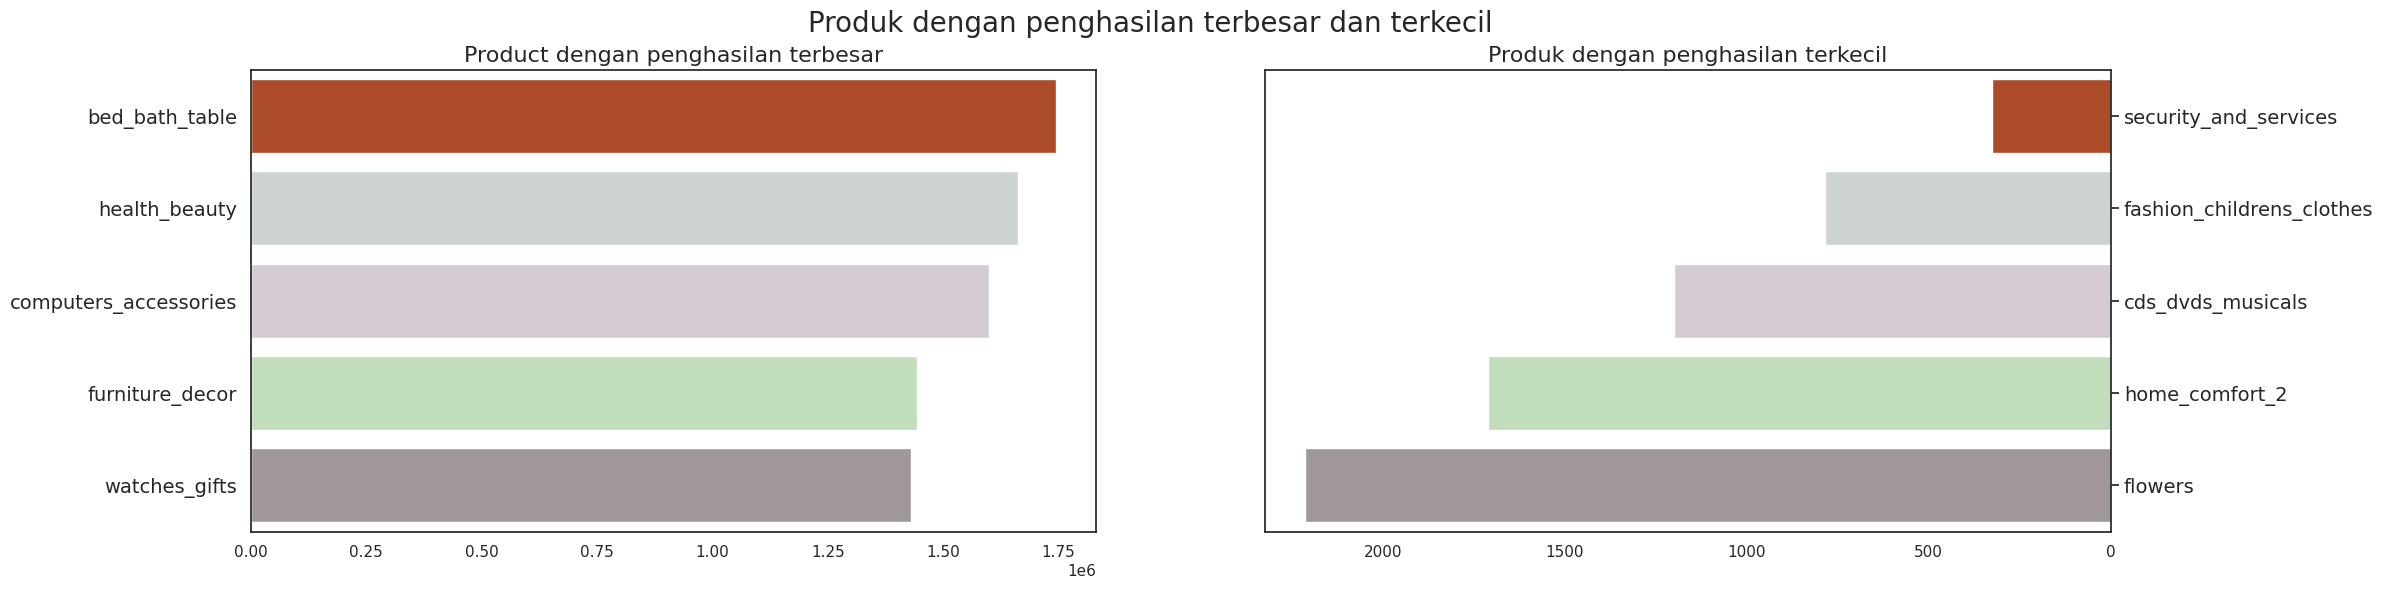

In [309]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
color = ['#C14112', '#CCD3D38F','#D7C9D694','#BFE2B683','#A0969B9D']
sns.barplot(x="payment_value",hue='product_category_name_english', y="product_category_name_english",data=sum_order_df.sort_values(by='payment_value',ascending=False).head(5),ax=ax[0],palette=color)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Product dengan penghasilan terbesar',fontsize=16)
ax[0].tick_params(axis='y',labelsize=14)

sns.barplot(x="payment_value",hue='product_category_name_english', y="product_category_name_english",data=sum_order_df.sort_values(by='payment_value',ascending=True).head(5),ax=ax[1],palette=color)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan penghasilan terkecil", loc="center", fontsize=16)
ax[1].tick_params(axis='y', labelsize=14)

plt.suptitle("Produk dengan penghasilan terbesar dan terkecil",fontsize=20)
plt.show()

> *Dari grafik diatas bisa disimpulkan bahwa Produk dengan penghasilan tebesar adalah bed_bath_table dan Produk dengan penghasilan terkecil adalah security_and_service.*

> ### Pertanyaan 2: Bagaimana tingkat kepuasan pelanggan?


In [310]:
review_score = all_data['review_score'].value_counts().sort_values(ascending=False)

result = all_data.groupby(by=['order_status','review_score'],sort=False).size().reset_index(name='score_count')
weights = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

result['weighted_score'] = result['review_score'].map(weights) * result['score_count']
total_weighted_score = result.groupby('order_status')['weighted_score'].sum()
total_review_count = result.groupby('order_status')['score_count'].sum()
average_satisfaction = total_weighted_score / total_review_count

average_satisfaction.sort_values(ascending=False).reset_index(name='average_satisfaction')

,order_status,average_satisfaction
0,delivered,4.080488
1,created,2.333333
2,approved,2.000000
3,shipped,1.976884
4,canceled,1.824658
5,invoiced,1.650538
6,unavailable,1.512539
7,processing,1.348649


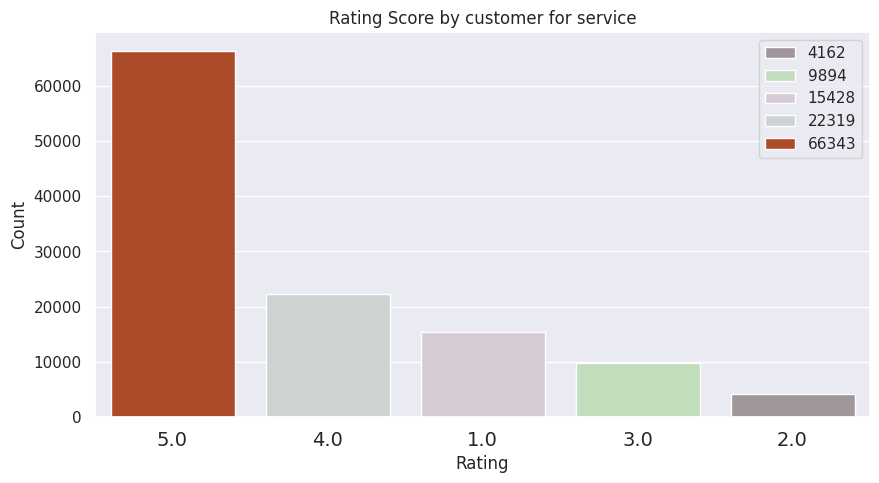

In [311]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x=review_score.index,
            y=review_score.values,
            order=review_score.index,
            palette=color[::-1],
            hue=review_score.values
)

plt.title('Rating Score by customer for service')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(fontsize=14)
plt.show()

> *Dari Grafik dan Analisa diatas bisa disimpulkan bahwa kepuasan pelanggan terhadap pelayanan yang diberikan menunjukkan sangat puas, pernyataan ini didukung dengan adanya bukti bahwa customer yang memberikan rating 5 memiliki data terbanyak daripada rating lainnya.*

> ### Pertanyaan 3: Bagaimana performa penjualan perusahaan?

In [312]:
# all_data['order_approved_at'] = pd.to_datetime(all_data['order_approved_at'])
monthly = all_data.resample(rule='ME', on='order_approved_at').agg({
    "order_id": 'nunique',
})
monthly.index = monthly.index.strftime('%B')
monthly = monthly.reset_index()
monthly.rename(columns={
    "order_id": "order_count",
}, inplace=True)


In [313]:
monthly.sort_values('order_count')

,order_approved_at,order_count
2,November,0
0,September,1
3,December,1
24,September,1
1,October,320
4,January,760
5,February,1765
7,April,2374
6,March,2689
9,June,3252


In [314]:
monthly_sum = monthly.groupby(by='order_approved_at')['order_count'].sum().reset_index()

In [315]:
month_order = [
    'January', 'February', 'March', 'April',
    'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]
monthly_sum['order_approved_at'] = pd.Categorical(monthly_sum['order_approved_at'], categories=month_order, ordered=True)
monthly_sum = monthly_sum.sort_values(by='order_approved_at')

In [316]:
monthly_sum

,order_approved_at,order_count
4,January,7947
3,February,8471
7,March,9977
0,April,9152
8,May,10759
6,June,9416
5,July,10150
1,August,10968
11,September,4303
10,October,4910


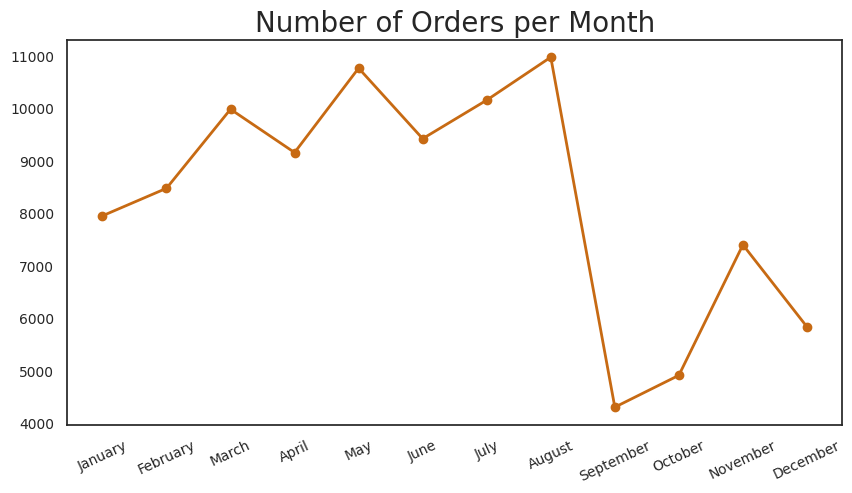

In [317]:
sns.set_style('white')
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_sum["order_approved_at"],
    monthly_sum["order_count"],
    marker='o',
    linewidth=2,
    color='#C76A13'
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

> *Dari Grafik ini bisa disimpulkan bahwa terjadi penurunan drastis pada bulan September dan mengalami peningkatan yang signifikan dari bulan october ke November*

> #### Pertanyaan 4: Customer terbanyak berdasarkan geografis,teletak dimana saja?

In [318]:
state_sum = all_data.groupby(by='customer_state').customer_id.nunique().reset_index()
state_sum.rename(columns={
    "customer_id":"count"
},inplace=True)
state_sum = state_sum.sort_values(by='count',ascending=False)
state_sum.head()

,customer_state,count
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


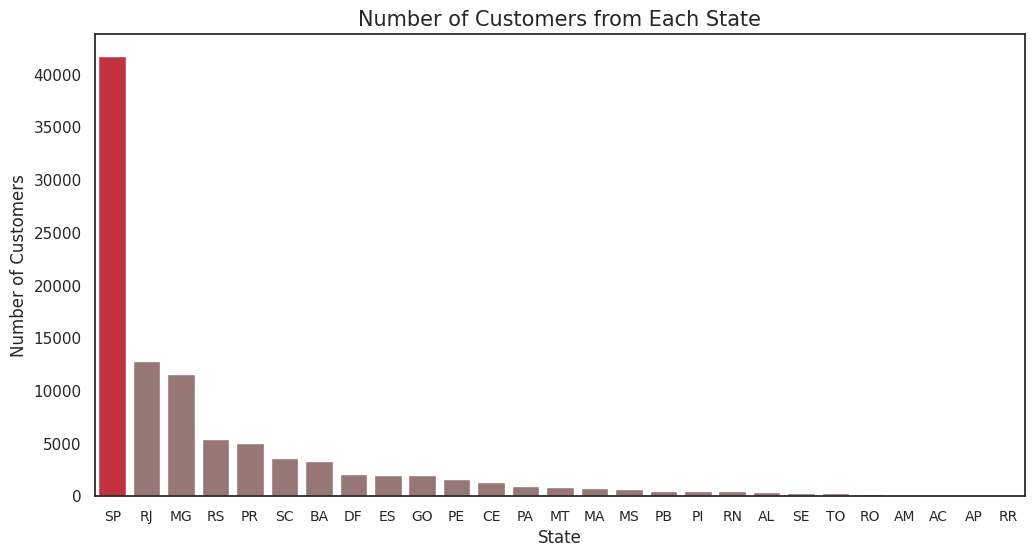

In [319]:
plt.figure(figsize=(12,6))

state_common = state_sum.loc[state_sum['count'].idxmax(),'customer_state']
sns.barplot(x='customer_state',y='count',hue='customer_state', data=state_sum, palette=["#DB1A2D" if state == state_common else "#9C7070" for state in state_sum['customer_state']])
plt.title("Number of Customers from Each State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=10)
plt.show()

In [320]:
geolocation_state = ecommerce['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
geolocation_state[geolocation_state['count'] >= 2].shape
state_mx = ecommerce['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)
geo_sv = ecommerce['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geo_sv = geo_sv.merge(state_mx,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')
cust_sv = ecommerce['customer'].merge(geo_sv,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')


In [321]:
cust_sv

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502070,-47.396822
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.727636,-46.542279
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,são bernardo do campo,SP,-23.726085,-46.544829
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531408,-46.656404
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,são paulo,SP,-23.531294,-46.656676
...,...,...,...,...,...,...,...,...,...,...
148538,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764,taboao da serra,SP,-23.615348,-46.766986
148539,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764,taboão da serra,SP,-23.614793,-46.766986
148540,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115,fortaleza,CE,-3.733993,-38.510418
148541,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120,canoas,RS,-29.949632,-51.169247


In [322]:
cust_sv.to_csv('./data/geo.csv',index=False)

In [323]:
def plot_bz_map(d):
    bz = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = d.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(bz, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()


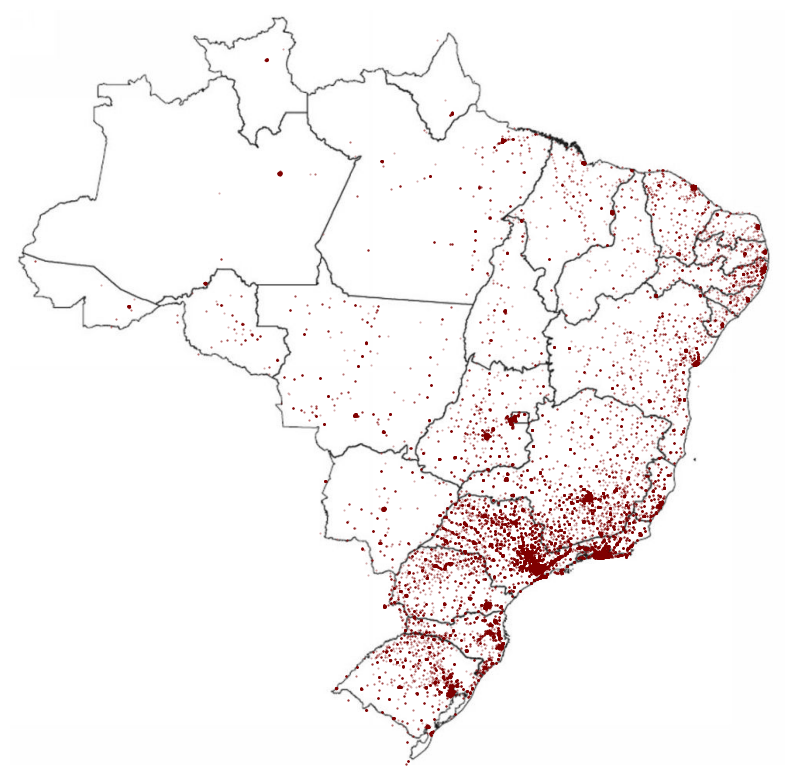

In [324]:
plot_bz_map(cust_sv.drop_duplicates(subset='customer_unique_id'))

> *Dari data dan grafik di atas, menunjukkan bahwa customer terbanyak datang dari negara bagian tenggara dan selatan. Customer lebih banyak berada di kota yang merupakan ibu kota seperti Sao Paulo(SP), Rio de Janeiro(RJ), dll.*

## Conclusion 

- *Produk apa yang mendapatkan penghasilan paling besar dan paling kecil*
  
  > Hasil visualisasi menunjukkan bahwa produk dengan penghasilan paling banyak adalah bed_bath_table dan produk dengan penghasilan paling sedikit adalah security_and_service.

- *Bagaimana tingkat kepuasan pelanggan?*

  > Hasil visualisasi menunjukkan bahwa kepuasan pelanggan terhadap pelayanan yang diberikan sangatlah memuaskan, pernyataan ini didukung dengan adanya bukti bahwa customer yang memberikan rating 5 memiliki data terbanyak daripada rating lainnya.

- *Bagaimana performa penjualan perusahaan?*
  
  > Performa penjualan perusahaan stabil pada bulan januari-agustus, penurunan drastis terjadi pada bulan september,lalu terjadi penaikan signifikan pada bulan oktober-november dan penurunan di bulan desember.

- *Customer terbanyak berdasarkan geografis,terletak dimana saja?*
  
  > Berdasarkan hasil visualisasi menunjukkan bahwa customer terbanyak berada di kota Sao Paulo(SP).